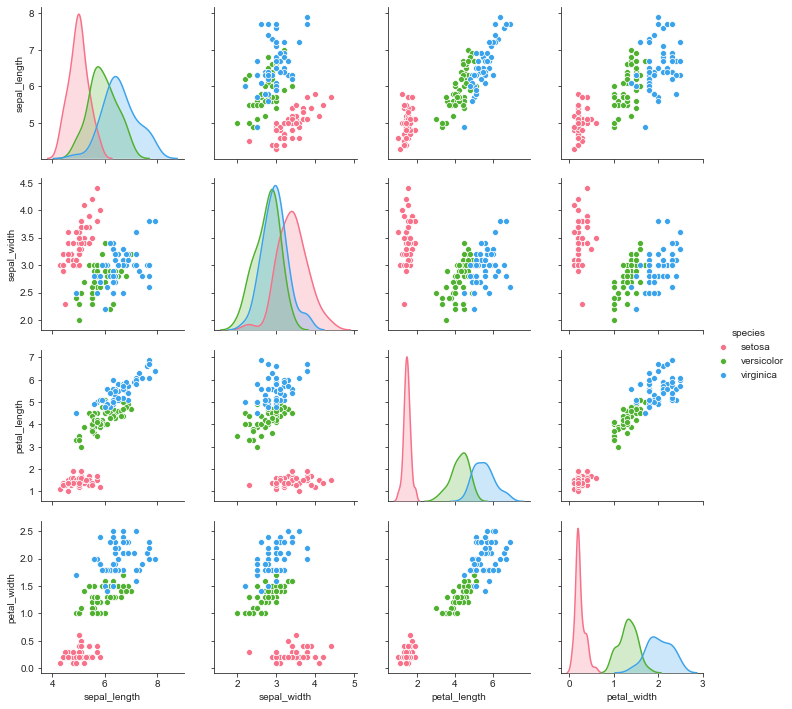

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df = sb.load_dataset('iris')  #load the data
sb.set_style("ticks")
sb.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")  #pairplot from seaborn
plt.show()

25 1.0


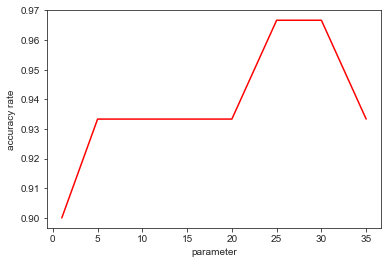

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import numpy as np
import csv
from matplotlib import pyplot as plt
iris = datasets.load_iris()
parameters=[1, 5, 10, 15, 20, 25, 30, 35]
result=[]
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
#test the accuracy of parameters
for p in parameters:
    knn = KNeighborsClassifier(n_neighbors=p)
    knn.fit(X_train,y_train)
    result.append(knn.score(X_val,y_val))
best_p=parameters[result.index(max(result))]
knn = KNeighborsClassifier(n_neighbors=best_p)
knn.fit(X_train,y_train)
print(best_p,knn.score(X_test,y_test))
plt.xlabel('parameter')   #draw the picture
plt.ylabel('accuracy rate')
plt.plot(parameters, result,'r')
plt.show()

0.1 0.9666666666666667


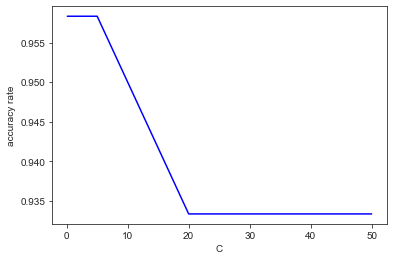

In [3]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
iris = datasets.load_iris()
c=[0.1, 0.5, 1, 2, 5, 10, 20, 50]
result=[]
#split the dataset
X_val, X_test, y_val, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
for c_value in c:
    clf = SVC(C=c_value,kernel='linear', random_state=42)
    scores = cross_val_score(clf, X_val, y_val, cv=10)
    result.append(scores.mean())
#record the best value of c
best_c=c[result.index(max(result))]
if best_c==0:
    best_c=None
clf=SVC(C=best_c, random_state=42)
clf.fit(X_val,y_val)
print(best_c,clf.score(X_test,y_test))
plt.xlabel('C')
plt.ylabel('accuracy rate')
plt.plot(c, result,'b')
plt.show()

3
1.0


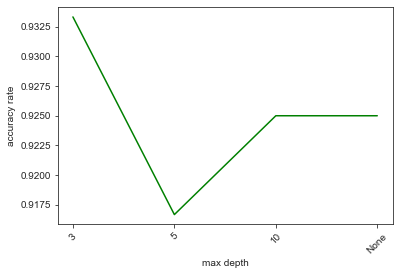

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
iris = datasets.load_iris()
depth=[3, 5, 10, None]
result=[]
#split the dataset
X, X_test, y, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
for d in depth:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores=cross_val_score(clf, X, y, cv=10)
    result.append(scores.mean())
best_depth=depth[result.index(max(result))]
if best_depth==0:
    best_depth=None
dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dtc.fit(X, y)
print(best_depth)
print(accuracy_score(y_test,dtc.predict(X_test)))
x=range(len(depth))
plt.xlabel('max depth')
plt.ylabel('accuracy rate')
plt.plot(x, result,'g')
plt.xticks(x, [3, 5, 10, 'None'], rotation=45)
plt.show()

3 50
1.0


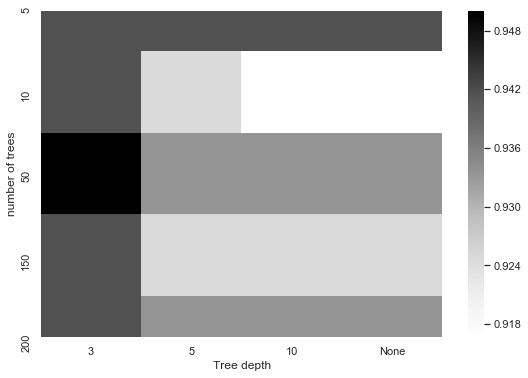

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns;sns.set()
from sklearn.metrics import accuracy_score
import numpy as np
iris = datasets.load_iris()
depth=[3, 5, 10, None]
num_of_trees=[5, 10, 50, 150, 200]
result=[]
X, X_test, y, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
for n in num_of_trees:
    result1 = []
    for d in depth:
        clf = RandomForestClassifier(max_depth=d,n_estimators=n, random_state=42)
        scores=cross_val_score(clf, X, y, cv=10)
        result1.append(scores.mean())
    result.append(result1)
#choose the best value of depth and number of trees
max=0
max_i=0
max_j=0
for i in range(len(result)):
    for j in range(len(result[i])):
        if result[i][j]>max:
            max=result[i][j]
            max_i=i
            max_j=j
rfc=RandomForestClassifier(max_depth=depth[max_j],n_estimators=num_of_trees[max_i], random_state=42)
rfc.fit(X,y)
print(depth[max_j],num_of_trees[max_i])
print(accuracy_score(y_test,rfc.predict(X_test)))
x_axis_labels = [3, 5, 10, 'None']
y_axis_labels=[5, 10, 50, 150, 200]
f, ax = plt.subplots(figsize=(9, 6))
ax=sns.heatmap(result, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="Greys")
#draw the heatmap
plt.xlabel("Tree depth")
plt.ylabel("number of trees")
plt.show()

5
1.0


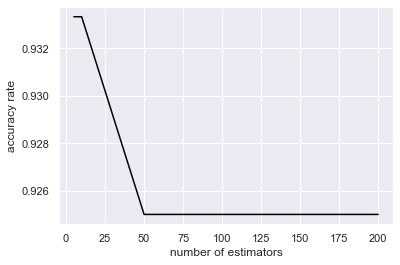

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
iris = datasets.load_iris()
num_e=[5, 10, 50, 150, 200]
result=[]
X, X_test, y, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
for e in num_e:
    clf = GradientBoostingClassifier(n_estimators=e,random_state=42)
    scores=cross_val_score(clf, X, y, cv=10)
    result.append(float(scores.mean()))
best_e=num_e[result.index(np.max(result))]
gbc=GradientBoostingClassifier(n_estimators=best_e,random_state=42)
gbc.fit(X, y)
print(best_e)
print(accuracy_score(y_test,gbc.predict(X_test)))
plt.xlabel('number of estimators')
plt.ylabel('accuracy rate')
plt.plot(num_e, result,'black')
plt.show()